In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

#### Loading the Dataset

In [2]:
# creating dataset connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("SELECT * FROM kendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,PurchasePrice,Description,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDoller,TotalSalesQuantity,...,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,GrossFit,PrifitMargin,StackturnOver,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,...,260999.20,68601.68,1290667.91,25.297693,-3031.0,1.338647,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,...,294438.66,144929.24,1015032.27,21.062810,-3791.0,1.266830,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,...,343854.07,123780.22,1119816.92,24.675786,-267.0,1.327594,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,...,368242.80,257032.07,1214774.94,27.139908,-1270.0,1.372493,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,...,249587.83,257032.07,1199901.61,28.412764,-2271.0,1.396897,1199901.61,28.412764,0.983556,1.396897


In [3]:
df.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
PurchasePrice            float64
Description               object
ActualPrice              float64
volume                   float64
TotalPurchaseQuantity      int64
TotalPurchaseDoller      float64
TotalSalesQuantity       float64
TotalSalesDollars        float64
TotalSalesPrice          float64
TotalExciseTax           float64
FreightCost              float64
GrossProfit              float64
ProfitMargin             float64
StockTurnover            float64
SalestoPurchaseRatio     float64
GrossFit                 float64
PrifitMargin             float64
StackturnOver            float64
SalesPurchaseRatio       float64
dtype: object

In [4]:
df.isnull().sum()

VendorNumber             0
VendorName               0
Brand                    0
PurchasePrice            0
Description              0
ActualPrice              0
volume                   0
TotalPurchaseQuantity    0
TotalPurchaseDoller      0
TotalSalesQuantity       0
TotalSalesDollars        0
TotalSalesPrice          0
TotalExciseTax           0
FreightCost              0
GrossProfit              0
ProfitMargin             0
StockTurnover            0
SalestoPurchaseRatio     0
GrossFit                 0
PrifitMargin             0
StackturnOver            0
SalesPurchaseRatio       0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis 

In [6]:
#summar Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDoller,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


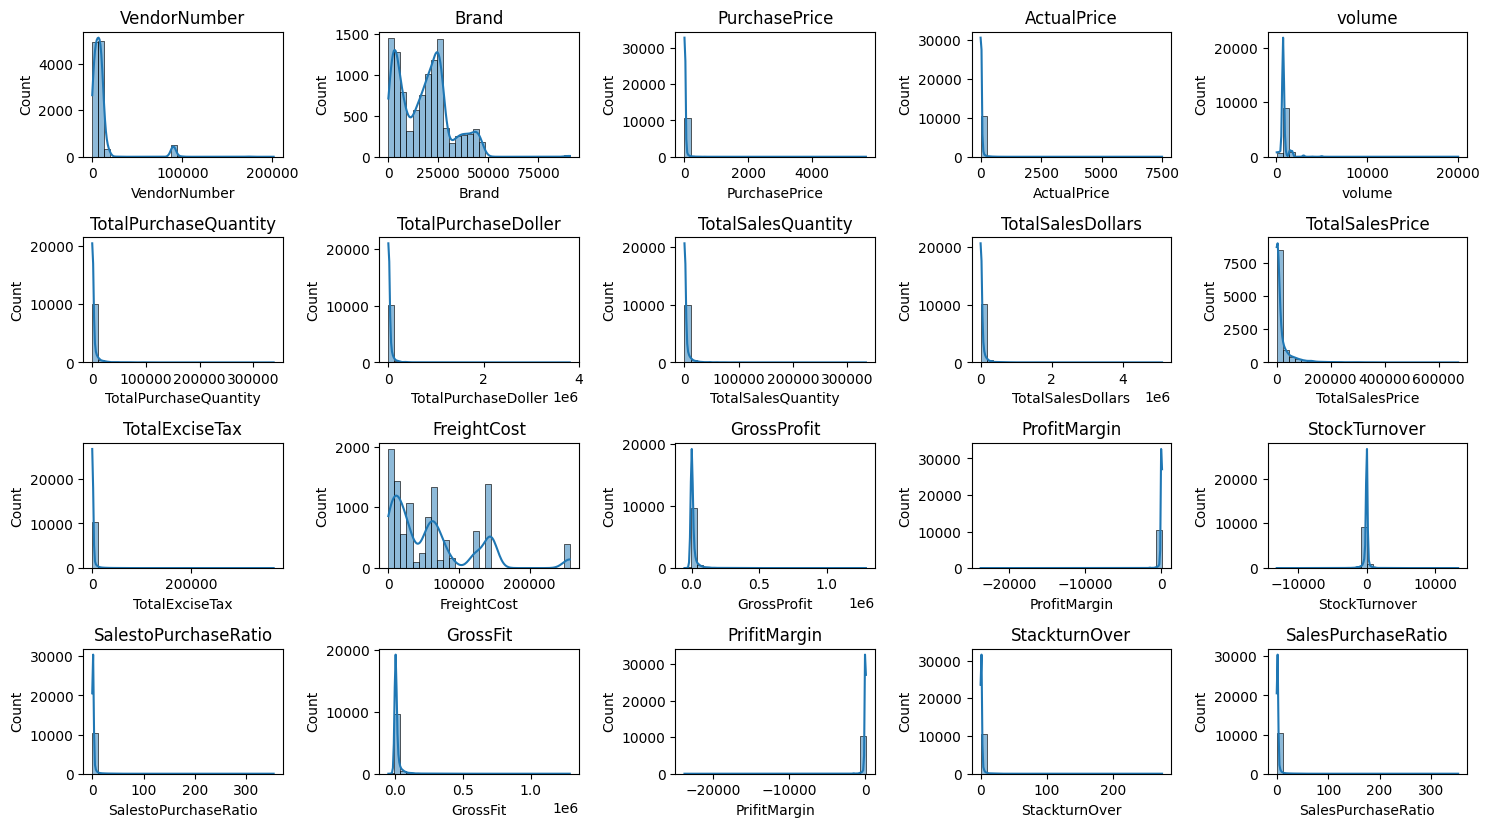

In [7]:
# Distributions Plots for numericals Columns

numerical_cols = df.select_dtypes(include =np.number).columns

plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5,5,i+1) # Adjust the layout as needed
    sns.histplot(df[col], kde =True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

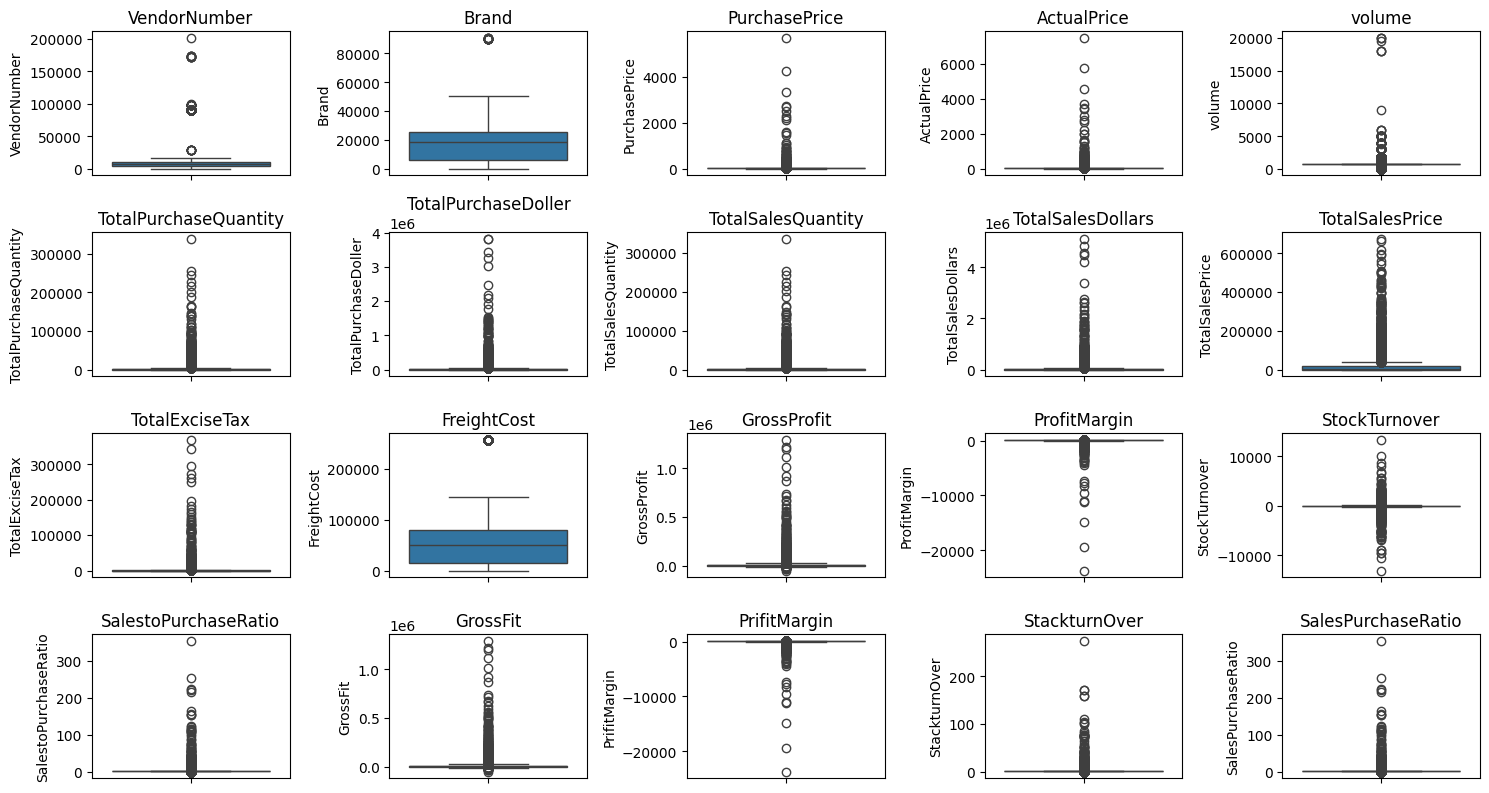

In [8]:
# Outlier Detection with Boxplots
plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5,5, i+1)
    sns.boxplot(y= df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Summary Statistics Insights:

##### Negative & Zero Values:

#### Outliers Indicated by High Standard Deviations:

.Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
.Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
.Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [9]:
# Let's filter the data by removing inconsistencies
df = pd.read_sql_query("""SELECT * 
FROM kendor_sales_summary 
WHERE GrossFit >0 
AND  PrifitMargin >0  AND TotalSalesQuantity>0 """, conn)

In [10]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,Description,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDoller,TotalSalesQuantity,...,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,GrossFit,PrifitMargin,StackturnOver,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,...,260999.20,68601.68,1290667.91,25.297693,-3031.0,1.338647,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,...,294438.66,144929.24,1015032.27,21.062810,-3791.0,1.266830,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,...,343854.07,123780.22,1119816.92,24.675786,-267.0,1.327594,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,...,368242.80,257032.07,1214774.94,27.139908,-1270.0,1.372493,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,...,249587.83,257032.07,1199901.61,28.412764,-2271.0,1.396897,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,1.32,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,...,0.55,27100.41,13.31,83.448276,3.0,6.041667,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,0.39,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,...,7.04,50293.62,63.32,96.436186,128.0,28.059829,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,0.74,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,...,0.10,14069.87,0.50,25.252525,0.0,1.337838,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,1.47,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,...,15.12,257032.07,141.81,98.974037,71.0,97.469388,141.81,98.974037,72.000000,97.469388


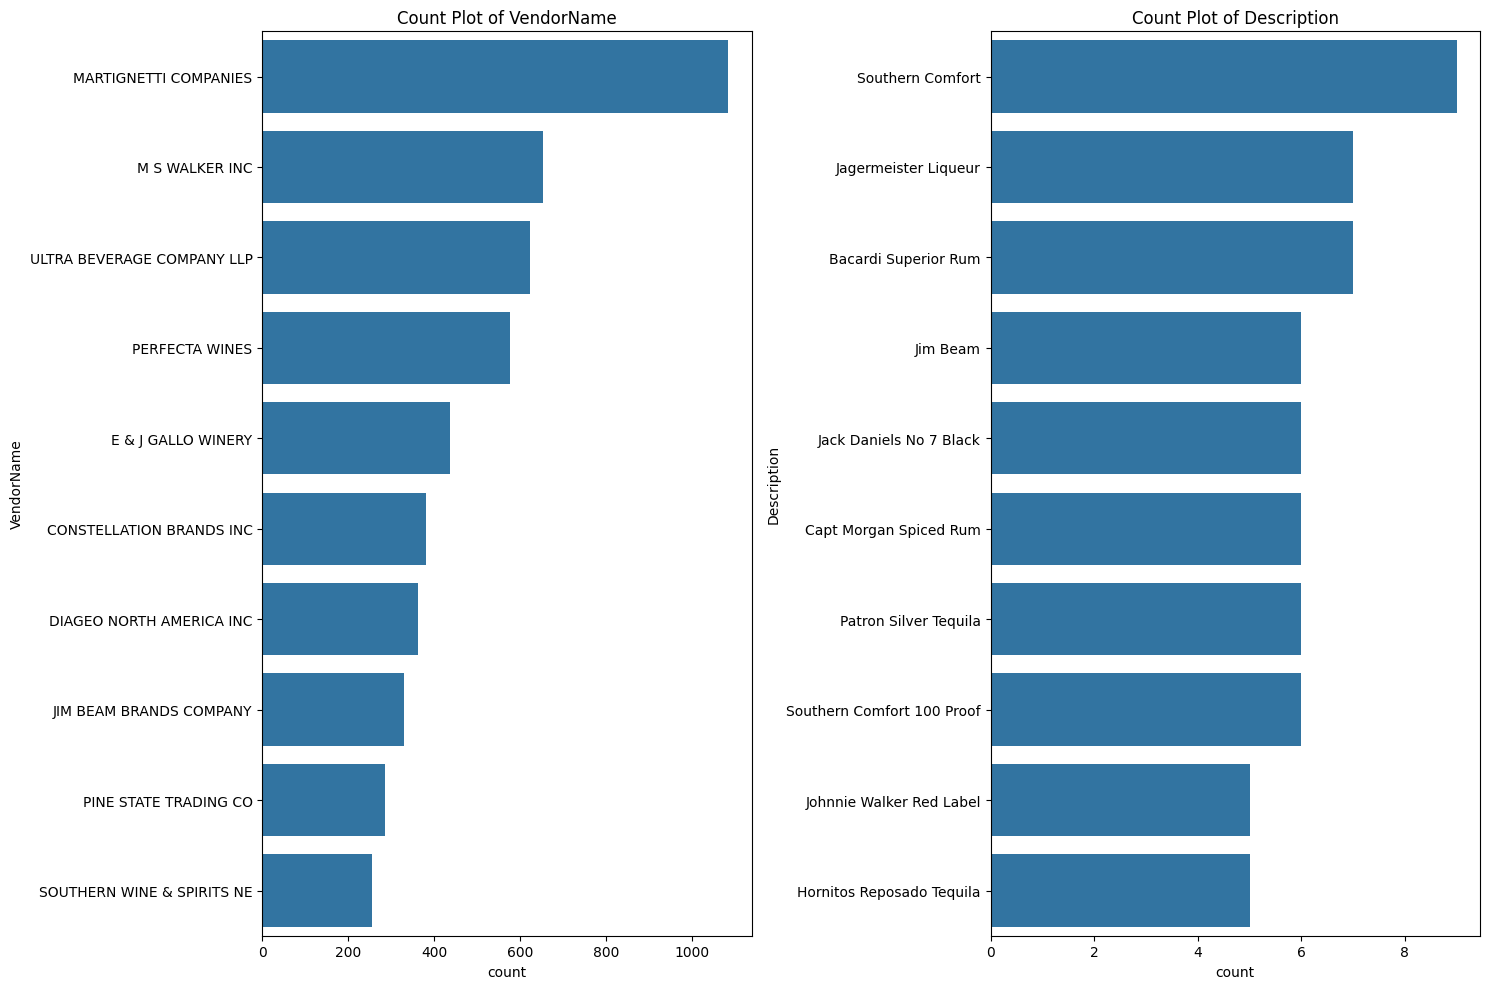

In [11]:
# Count Plots for Categorical columns
ctaegorical_cols = ["VendorName", "Description"]

plt.figure(figsize = (15,10))
for i,col in enumerate(ctaegorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot(y= df[col], order= df[col].value_counts().index[:10]) #Top 10 Category
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

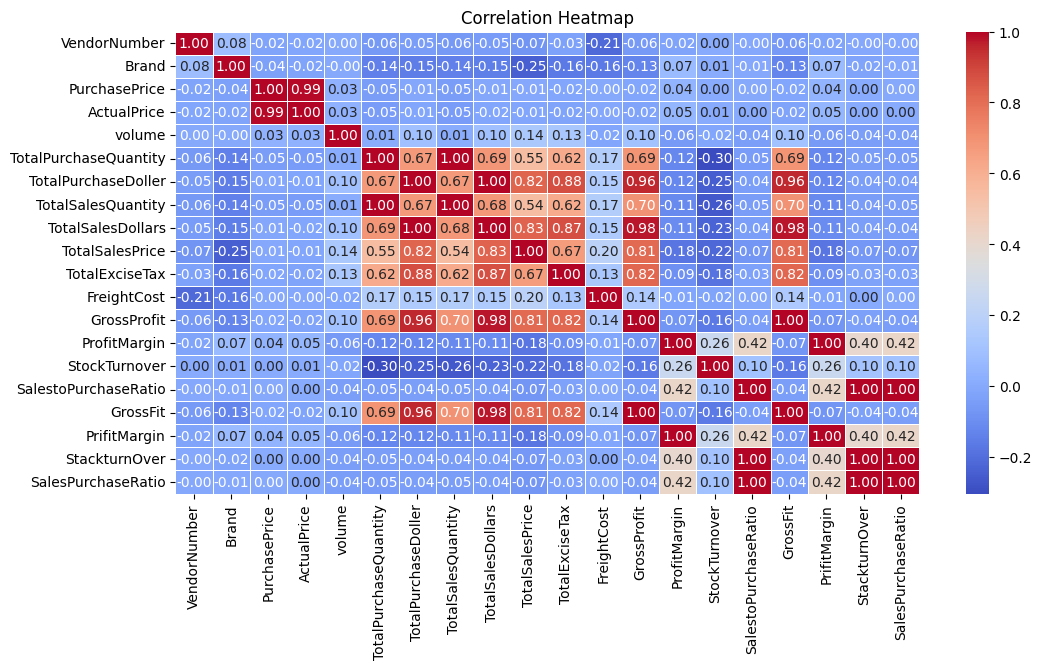

In [12]:
# Correleation Heatmap->
plt.figure(figsize=(12,6))
Correleation_matrix = df[numerical_cols].corr()
sns.heatmap(Correleation_matrix, annot= True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Correlation Insights
- PurchasePrice has weak correlations with TotalSales Dollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
- Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
- Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
- Stock Turnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability

### Data Analysis

- Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [13]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'PrifitMargin':'mean'}).reset_index()

In [14]:
brand_performance

,Description,TotalSalesDollars,PrifitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [15]:
## Now we find thresold value...means we give condition ..like koun sa se promotional brand hai ki nhi
low_sales_Thresold = brand_performance['TotalSalesDollars'].quantile(0.15)  # Thresold value 15% se low ho
High_margin_Thresold = brand_performance['PrifitMargin'].quantile(0.85)

In [16]:
print(f"low_sales_Thresold value is: {low_sales_Thresold}")
print(f"High_margin_Thresold value is: {High_margin_Thresold}")

low_sales_Thresold value is: 560.299
High_margin_Thresold value is: 64.97017552750113


In [17]:
# Filter brands with low sales but high profit margins : means aise brands jinka value below 560.299 rs and above 64.97017552750113 ho.

target_brands = brand_performance[
        (brand_performance['TotalSalesDollars'] <= low_sales_Thresold) &
        (brand_performance['PrifitMargin'] >= High_margin_Thresold)
]
print("Brands with Low sales and profit margins:")
display(target_brands.sort_values('TotalSalesDollars').reset_index())

Brands with Low sales and profit margins:


,index,Description,TotalSalesDollars,PrifitMargin
0,6199,Santa Rita Organic Svgn Bl,9.99,66.466466
1,2369,Debauchery Pnt Nr,11.58,65.975820
2,2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
3,2188,Crown Royal Apple,27.86,89.806174
4,6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...,...
193,5074,Nanbu Bijin Southern Beauty,535.68,76.747312
194,2271,Dad's Hat Rye Whiskey,538.89,81.851584
195,57,A Bichot Clos Marechaudes,539.94,67.740860
196,6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [18]:
# for Btetter visulization
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<1000]

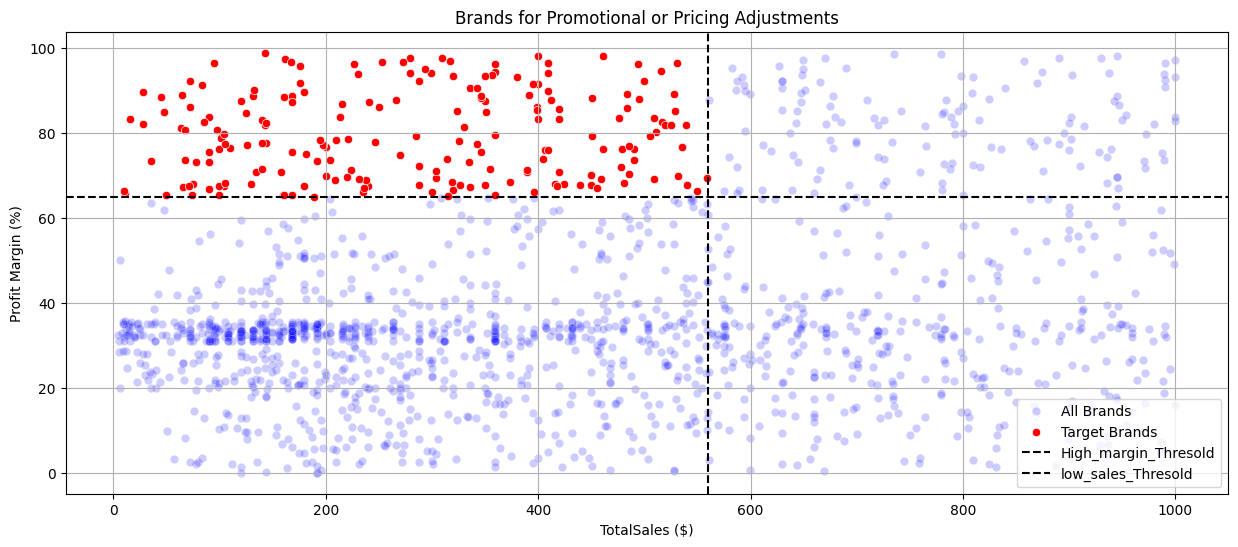

In [19]:
# We'll check that which brand is up amd down of thresold value.
plt.figure(figsize =(15,6))

sns.scatterplot(data = brand_performance,x= 'TotalSalesDollars',y= 'PrifitMargin', color='blue',label = "All Brands",alpha=0.2 ) 
sns.scatterplot(data = target_brands,x ='TotalSalesDollars', y= 'PrifitMargin',color ='red',label = "Target Brands")

plt.axhline(High_margin_Thresold , linestyle ='--', color= 'black', label = 'High_margin_Thresold')
plt.axvline(low_sales_Thresold , linestyle= '--', color= 'black', label = 'low_sales_Thresold')

plt.xlabel("TotalSales ($)")
plt.ylabel("Profit Margin (%)")
plt.title('Brands for Promotional or Pricing Adjustments')
plt.legend()
plt.grid(True)
plt.show()

####  2. Which vendors and brands demonstrates the highest sales performance ?

In [20]:
# Top Vendors & Brands by sales Performance
top_vendors = df.groupby("VendorName") ["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description") ["TotalSalesDollars"].sum().nlargest(10)

In [21]:
print(f"top_vendors is: {top_vendors}")
print("\\")
print(f"top_brands is: {top_brands}")

top_vendors is: VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64
\
top_brands is: Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64


In [22]:
def format_dollars(value):   # Brand ki value more vidiable banane ke liye ...so that value will show in Million
    if value>= 1_00_000:
        return f"{value/1_00_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [23]:
top_brands.apply(lambda x : format_dollars(x))  # now brand Value in Milllion

Description
Jack Daniels No 7 Black    79.65M
Tito's Handmade Vodka      74.00M
Grey Goose Vodka           72.10M
Capt Morgan Spiced Rum     63.56M
Absolut 80 Proof           62.45M
Jameson Irish Whiskey      57.16M
Ketel One Vodka            50.70M
Baileys Irish Cream        41.50M
Kahlua                     36.05M
Tanqueray                  34.57M
Name: TotalSalesDollars, dtype: object

In [24]:
# Now We create Barplot for bith top_vendor and top_brands

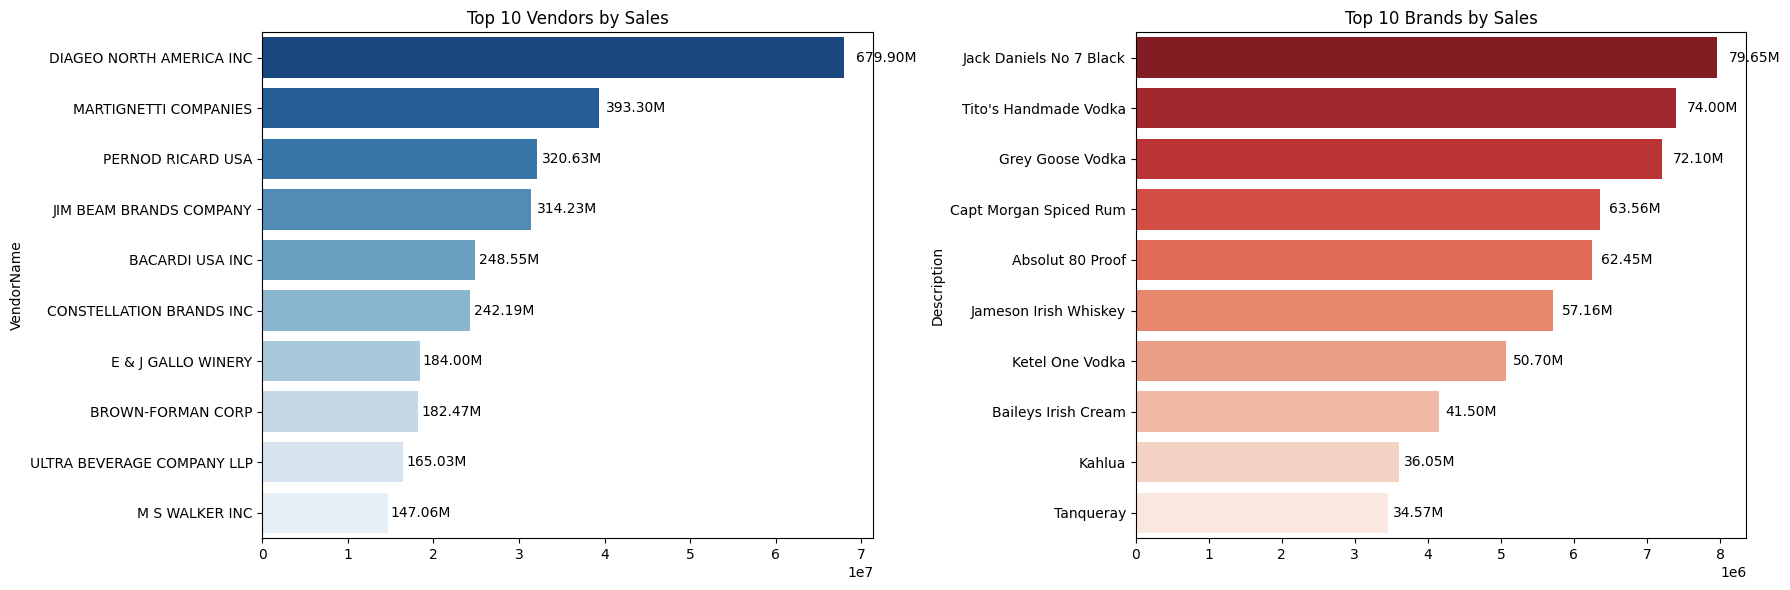

In [25]:
plt.figure(figsize = (18,6))

# Plot for Top vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y= top_vendors.index, x =top_vendors.values, palette = "Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width()* 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha= 'left', va= 'center', fontsize =10, color = 'black')
    
# Plot for Top Brands 
plt.subplot(1,2,2)
ax2 = sns.barplot(y= top_brands.index.astype(str), x =top_brands.values, palette = "Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()* 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha= 'left', va= 'center', fontsize =10, color = 'black')
plt.tight_layout()
plt.show()

#### Which vendors contribute the most to total purchase dollars ?

In [26]:
vendor_performance = df.groupby("VendorName").agg({
        'TotalPurchaseDoller':'sum',
        'GrossProfit':'sum',
        'TotalSalesDollars':'sum'  
}).reset_index()
vendor_performance.shape

(119, 4)

In [27]:
vendor_performance

,VendorName,TotalPurchaseDoller,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [28]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDoller'] /vendor_performance['TotalPurchaseDoller'].sum()*100

In [29]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

In [30]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDoller'] = top_vendors['TotalPurchaseDoller'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDoller,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,500.97M,178.93M,679.90M,16.30
57,MARTIGNETTI COMPANIES,255.02M,138.28M,393.30M,8.30
68,PERNOD RICARD USA,238.51M,82.12M,320.63M,7.76
46,JIM BEAM BRANDS COMPANY,234.94M,79.29M,314.23M,7.64
6,BACARDI USA INC,174.32M,74.23M,248.55M,5.67
20,CONSTELLATION BRANDS INC,152.74M,89.45M,242.19M,4.97
11,BROWN-FORMAN CORP,132.39M,50.08M,182.47M,4.31
30,E & J GALLO WINERY,120.69M,63.31M,184.00M,3.93
106,ULTRA BEVERAGE COMPANY LLP,111.67M,53.35M,165.03M,3.63
53,M S WALKER INC,97.64M,49.42M,147.06M,3.18


In [31]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

In [32]:
top_vendors['Cumulative_Contribution%'] =top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDoller,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,500.97M,178.93M,679.90M,16.30,16.30
57,MARTIGNETTI COMPANIES,255.02M,138.28M,393.30M,8.30,24.60
68,PERNOD RICARD USA,238.51M,82.12M,320.63M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,234.94M,79.29M,314.23M,7.64,40.00
6,BACARDI USA INC,174.32M,74.23M,248.55M,5.67,45.67
20,CONSTELLATION BRANDS INC,152.74M,89.45M,242.19M,4.97,50.64
11,BROWN-FORMAN CORP,132.39M,50.08M,182.47M,4.31,54.95
30,E & J GALLO WINERY,120.69M,63.31M,184.00M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,111.67M,53.35M,165.03M,3.63,62.51
53,M S WALKER INC,97.64M,49.42M,147.06M,3.18,65.69


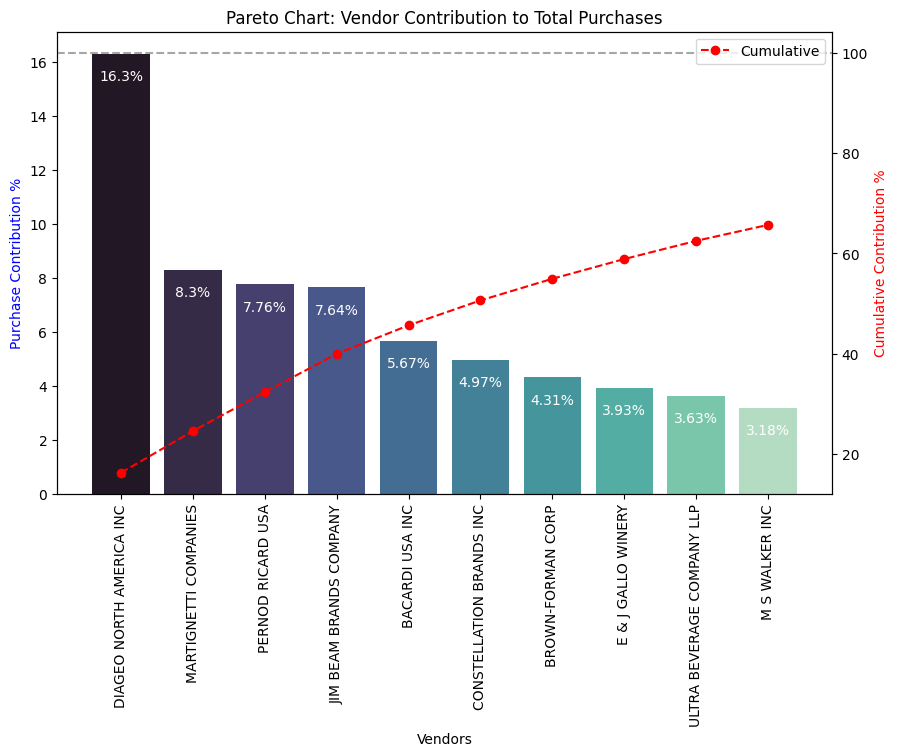

In [33]:
## we use pareto chart to shows lower verndor.or those vendor who is't activate

fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'],  palette="mako",  ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value) + '%', 
             ha='center', fontsize=10, color='white')

ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed',  label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')
plt.show()

#### How much of total procurement is dependent on the top vendors ?

In [42]:
print(f"Total Purchase Contribution of top 10 vendor is: {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 vendor is: 65.69%


#### Show the disribution

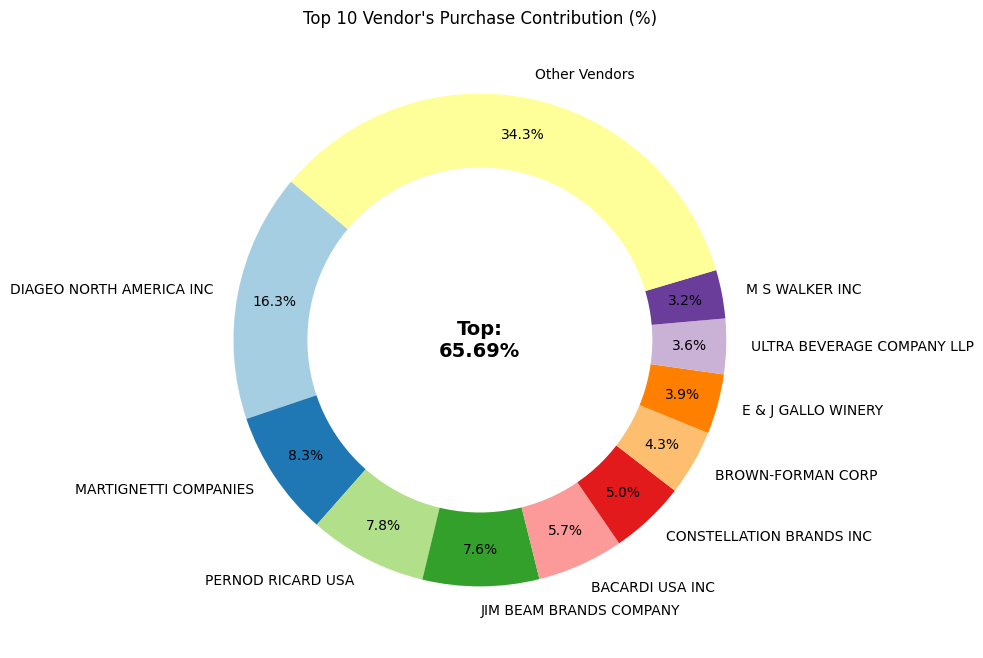

In [50]:
vendors = list(top_vendors['VendorName'].values)
PurchaseContribution = list(top_vendors['PurchaseContribution%'].values)
totalContribution = sum(PurchaseContribution)
remaining_contribution = 100 - totalContribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
PurchaseContribution.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    PurchaseContribution,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center (Donut effect)
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig.gca().add_artist(centre_circle)

# Add Total Contribution Text in Center
plt.text(0, 0, f"Top:\n{totalContribution:.2f}%", fontsize=14,
         fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()


#### Does Purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [53]:
df['UnitPurchasePrice'] = df['TotalPurchaseDoller']/ df['TotalPurchaseQuantity']
df

,VendorNumber,VendorName,Brand,PurchasePrice,Description,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDoller,TotalSalesQuantity,...,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,GrossFit,PrifitMargin,StackturnOver,SalesPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,...,68601.68,1290667.91,25.297693,-3031.0,1.338647,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,...,144929.24,1015032.27,21.062810,-3791.0,1.266830,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,...,123780.22,1119816.92,24.675786,-267.0,1.327594,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,...,257032.07,1214774.94,27.139908,-1270.0,1.372493,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,...,257032.07,1199901.61,28.412764,-2271.0,1.396897,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,1.32,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,...,27100.41,13.31,83.448276,3.0,6.041667,13.31,83.448276,2.500000,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,0.39,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,...,50293.62,63.32,96.436186,128.0,28.059829,63.32,96.436186,22.333333,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,0.74,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,...,14069.87,0.50,25.252525,0.0,1.337838,0.50,25.252525,1.000000,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,1.47,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,...,257032.07,141.81,98.974037,71.0,97.469388,141.81,98.974037,72.000000,97.469388,1.47


#### We divide TotalPurchaseQuantity into three parts

In [55]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels= ['Small', 'Medium', 'Large'])

In [58]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [61]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


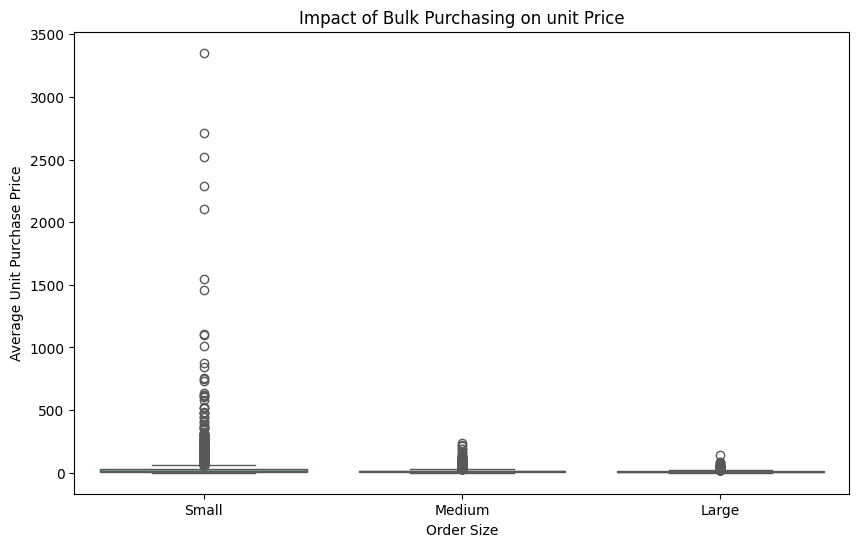

In [62]:
plt.figure(figsize =(10,6))
sns.boxplot(data =df, x= 'OrderSize', y= 'UnitPurchasePrice', palette ='Set2')
plt.title('Impact of Bulk Purchasing on unit Price')
plt.xlabel("Order Size")
plt.ylabel('Average Unit Purchase Price')
plt.show()

- Vendors buying in bulk (Large Order (Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial (-72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

#### Which Vendors have Low inventary turnover, indicating excess stock and slow-moving products?

In [81]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,Description,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDoller,TotalSalesQuantity,...,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,GrossFit,PrifitMargin,StackturnOver,SalesPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,...,1290667.91,25.297693,-3031.0,1.338647,1290667.91,25.297693,0.979108,1.338647,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,...,1015032.27,21.062810,-3791.0,1.266830,1015032.27,21.062810,0.976890,1.266830,23.19,Large
2,17035,PERNOD RICARD USA,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,...,1119816.92,24.675786,-267.0,1.327594,1119816.92,24.675786,0.998575,1.327594,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,...,1214774.94,27.139908,-1270.0,1.372493,1214774.94,27.139908,0.993703,1.372493,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,...,1199901.61,28.412764,-2271.0,1.396897,1199901.61,28.412764,0.983556,1.396897,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,1.32,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,...,13.31,83.448276,3.0,6.041667,13.31,83.448276,2.500000,6.041667,1.32,Small
8560,8004,SAZERAC CO INC,5683,0.39,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,...,63.32,96.436186,128.0,28.059829,63.32,96.436186,22.333333,28.059829,0.39,Small
8561,3924,HEAVEN HILL DISTILLERIES,9123,0.74,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,...,0.50,25.252525,0.0,1.337838,0.50,25.252525,1.000000,1.337838,0.74,Small
8562,3960,DIAGEO NORTH AMERICA INC,6127,1.47,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,...,141.81,98.974037,71.0,97.469388,141.81,98.974037,72.000000,97.469388,1.47,Small


In [82]:
df[df['StackturnOver']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending = True).head(10)

,StockTurnover
VendorName,
WESTERN SPIRITS BEVERAGE CO,-1008.857143
SIDNEY FRANK IMPORTING CO,-641.125000
MAJESTIC FINE WINES,-572.833333
DIAGEO NORTH AMERICA INC,-533.836957
OLE SMOKY DISTILLERY LLC,-521.428571
SWEET BABY VINEYARD,-508.000000
SAZERAC CO INC,-496.028571
WILLIAM GRANT & SONS INC,-484.837209
DISARONNO INTERNATIONAL LLC,-481.833333


#### How much capital is locked in unsoold inventory per vendor, and which vendors contribute the most to it ?

In [87]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])* df['PurchasePrice']
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 27.08M


In [89]:
## Aggregate Capital Locked per vendor
inventory_value_per_vendor = df.groupby('VendorName') ['UnsoldInventoryValue'].sum().reset_index()
# Sort vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by= 'UnsoldInventoryValue', ascending= False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,7.22M
46,JIM BEAM BRANDS COMPANY,5.55M
68,PERNOD RICARD USA,4.71M
116,WILLIAM GRANT & SONS INC,4.02M
30,E & J GALLO WINERY,2.28M
79,SAZERAC CO INC,1.98M
11,BROWN-FORMAN CORP,1.78M
20,CONSTELLATION BRANDS INC,1.34M
61,MOET HENNESSY USA INC,1.26M
77,REMY COINTREAU USA INC,1.19M


#### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [94]:
top_thersold = df['TotalSalesDollars'].quantile(0.75)
low_thersold = df['TotalSalesDollars'].quantile(0.25)

In [98]:
top_vendors = df[df['TotalSalesDollars'] >= top_thersold] ["ProfitMargin"].dropna() 
low_vendors = df[df['TotalSalesDollars'] <= low_thersold] ["ProfitMargin"].dropna() 

In [104]:
print(f"top-performing vendors are:{top_vendors}")
print('\\')
print(f"top-performing vendors are: {low_vendors}")

top-performing vendors are:0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64
\
top-performing vendors are: 5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64


In [107]:
# Confidence Interval

def Confidence_interval(data, confidence =0.95):
    mean_val =np.mean(data)
    std_errr= np.std(data, ddof=1)/ np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1 + confidence)/ 2, df= len(data)-1)
    margin_of_error = t_critical * std_errr
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


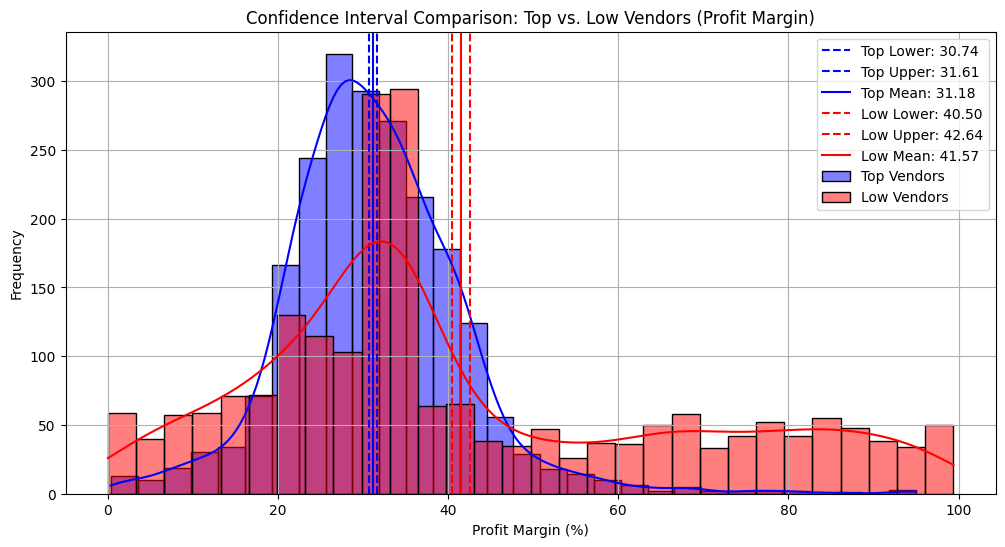

In [126]:
top_mean, top_lower, top_upper  =Confidence_interval(top_vendors)
low_mean, low_lower, low_upper = Confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")
plt.figure(figsize=(12, 6))

#Top Vendors Plot
sns.histplot(top_vendors, kde = True, color ="blue", bins = 30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label= f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot

sns.histplot(low_vendors, kde = True, color="red", bins =30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

### Is there a significant difference in profit margins between top-performing and low-performing vendors?
Hypothesis:
- Ho (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.
- H1 (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [128]:
top_thersold = df['TotalSalesDollars'].quantile(0.75)
low_thersold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_thersold] ["ProfitMargin"].dropna() 
low_vendors = df[df['TotalSalesDollars'] <= low_thersold] ["ProfitMargin"].dropna() 

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var = False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to reject Ho: No Significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.
